# 使用するライブラリをインストールしよう

In [ ]:
pip install janome

     |████████████████████████████████| 21.5MB 1.7MB/s 


# ライブラリとデータのインポート

In [ ]:
import os
from janome.tokenizer import Tokenizer
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

dir = "/content/drive/My Drive/Colab Notebooks/Business_description/"

folder = []
folder = os.listdir(dir)

training_docs = []

# 文章を形態素解析で分かち書きしよう

In [ ]:
# 解析のためのオブジェクト化
t = Tokenizer()

i = 0
for text in folder:
    data = []
    # ファイルを開く
    file_path = dir + text
    file = open(file_path, "r", encoding="UTF-8_sig")

    # リスト化
    for line in file:
        line = line.strip()
        line = line.replace('\u3000', '').replace('\xa0', '').replace(' ', '')
        MA = t.tokenize(line, wakati=True)
        data.append(MA)
                        
    tag_doc = data
    tag_tag = "txts_{}" .format(text[:8])
    tag_doc = [item for l in tag_doc for item in l]
    
    training_docs.append(TaggedDocument(words=tag_doc, tags=[tag_tag]))
    i += 1

# Doc2Vecでテキストをベクトル化しよう

In [ ]:
# モデルの学習
model = Doc2Vec(documents=training_docs, size=100, min_count=1, dm=0)

# モデルの保存
model.save('doc2vec.model')

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
tags = []
vecs = []

for i in range(len(model.docvecs)):
    # ベクトルの取得
    vecs.append(model.docvecs[i])  
    # タグの取得
    tags.append(model.docvecs.index_to_doctag(i))

print(tags) 
print(vecs[:1]) 

['txts_S100I4KQ', 'txts_S100I4EM', 'txts_S100HTOQ', 'txts_S100G4C7', 'txts_S100G9BO', 'txts_S100GDPD', 'txts_S100I4DS', 'txts_S100HTVS', 'txts_S100HU8O', 'txts_S100HT4W', 'txts_S100HO5D', 'txts_S100H6HF', 'txts_S100H6D7', 'txts_S100H17H', 'txts_S100H6IZ', 'txts_S100HM31', 'txts_S100H6AR', 'txts_S100HNK2', 'txts_S100G9V0', 'txts_S100GDL5', 'txts_S100HO0J', 'txts_S100GUY0', 'txts_S100GUZI', 'txts_S100HNJZ', 'txts_S100HMW8', 'txts_S100HNGZ', 'txts_S100HO5K', 'txts_S100G63Q', 'txts_S100G8IS', 'txts_S100HTNP', 'txts_S100HTDK', 'txts_S100GA80', 'txts_S100HODP', 'txts_S100H7HH', 'txts_S100H0Q8', 'txts_S100HHHV', 'txts_S100G729', 'txts_S100HHC0', 'txts_S100H0ND', 'txts_S100G94Q', 'txts_S100GB0T', 'txts_S100FIYE', 'txts_S100FJAQ', 'txts_S100GDJK', 'txts_S100GV98', 'txts_S100I41F', 'txts_S100GBUC', 'txts_S100G27M', 'txts_S100G8WP', 'txts_S100GAHR', 'txts_S100GUHS', 'txts_S100FVJR', 'txts_S100GKMJ', 'txts_S100GAU0', 'txts_S100GL4O', 'txts_S100HNWT', 'txts_S100HHSP', 'txts_S100HMN8', 'txts_S100GB9

# ベクトル化したデータを可視化しよう

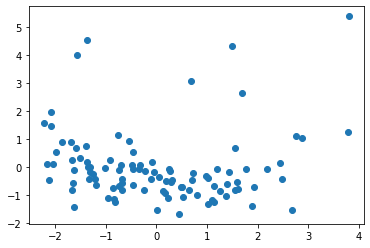

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def draw_scatter_plot(vecs, tags):

    # Scikit-learnのPCAでn_componentsの数値で次元数を決める
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)

    # matplotlibによる可視化
    fig, ax = plt.subplots()
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]
    
    ax.scatter(x, y)
    plt.show()

draw_scatter_plot(vecs, tags)

# ベクトルをクラスタリングして、結果を確認しよう

In [ ]:
from sklearn.cluster import KMeans

# クラスタの数を決めるのはn_clusters
kmeans = KMeans(n_clusters=3, max_iter=100, init="k-means++", n_jobs=-1)
# 学習
cluster = kmeans.fit_predict(vecs)

# 保存
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(kmeans, fp)

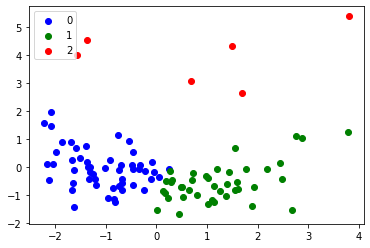

In [ ]:
def draw_scatter_plot_cluster(vecs, tags, cluster):
    
    colors = ["b", "g", "r", "c", "m", "y", "k"]

    # Scikit-learnのPCAでn_componentsの数値で次元数を決める
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)

    # matplotlibによる可視化
    fig, ax = plt.subplots()
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]
    
    c_count = max(cluster)

    for i in range(c_count + 1):
        xx = []
        yy = []
        for c, a, b, t in zip(cluster, x, y, tags):
            if i == c:
                xx.append(a)
                yy.append(b)
        ax.scatter(xx, yy, c=colors[i % 7])
    ax.legend(range(c_count+1))             # 凡例表示 例）ax.legend(["医療系", "コンサルティングファーム", "建設"])
    plt.show()

draw_scatter_plot_cluster(vecs, tags, cluster)

In [ ]:
print(tags)
print(cluster)

my_dict = dict(zip(tags, cluster))
print(my_dict)


['txts_S100I4KQ', 'txts_S100I4EM', 'txts_S100HTOQ', 'txts_S100G4C7', 'txts_S100G9BO', 'txts_S100GDPD', 'txts_S100I4DS', 'txts_S100HTVS', 'txts_S100HU8O', 'txts_S100HT4W', 'txts_S100HO5D', 'txts_S100H6HF', 'txts_S100H6D7', 'txts_S100H17H', 'txts_S100H6IZ', 'txts_S100HM31', 'txts_S100H6AR', 'txts_S100HNK2', 'txts_S100G9V0', 'txts_S100GDL5', 'txts_S100HO0J', 'txts_S100GUY0', 'txts_S100GUZI', 'txts_S100HNJZ', 'txts_S100HMW8', 'txts_S100HNGZ', 'txts_S100HO5K', 'txts_S100G63Q', 'txts_S100G8IS', 'txts_S100HTNP', 'txts_S100HTDK', 'txts_S100GA80', 'txts_S100HODP', 'txts_S100H7HH', 'txts_S100H0Q8', 'txts_S100HHHV', 'txts_S100G729', 'txts_S100HHC0', 'txts_S100H0ND', 'txts_S100G94Q', 'txts_S100GB0T', 'txts_S100FIYE', 'txts_S100FJAQ', 'txts_S100GDJK', 'txts_S100GV98', 'txts_S100I41F', 'txts_S100GBUC', 'txts_S100G27M', 'txts_S100G8WP', 'txts_S100GAHR', 'txts_S100GUHS', 'txts_S100FVJR', 'txts_S100GKMJ', 'txts_S100GAU0', 'txts_S100GL4O', 'txts_S100HNWT', 'txts_S100HHSP', 'txts_S100HMN8', 'txts_S100GB9

In [ ]:
keys = [k for k, v in my_dict.items() if v == 2]
print(keys)

['txts_S100HT4W', 'txts_S100H6AR', 'txts_S100HNJZ', 'txts_S100FIYE', 'txts_S100FJAQ', 'txts_S100FIGF']


# 新しいテキストを分類しよう

In [ ]:
# 読み込み
import pickle
with open('model.pickle', mode='rb') as fp:
   kmeans = pickle.load(fp)

test_line = []
file_path = "/content/S100G5J9_company_business_description.txt"
file = open(file_path, "r", encoding="UTF-8_sig")
    
# リスト化
for line in file:
    line = line.strip()
    line = line.replace('\u3000', '').replace('\xa0', '').replace(' ', '')
    MA = t.tokenize(line, wakati=True)
    test_line.append(MA)
tag_doc = test_line
tag_doc = [item for l in tag_doc for item in l]

target_vec = model.infer_vector(tag_doc)

# そのベクトルをリスト内にいれて学習済みモデルで予測する
prediction = kmeans.predict([target_vec])

print(prediction)

[2]
